In [1]:
%matplotlib inline
import pandas as pd
import json
import requests
from sklearn.preprocessing import MultiLabelBinarizer
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
pd.options.display.max_rows = 10

In [2]:
oscar_movies = pd.read_csv("oscar_movies.csv")
oscar_movies.head()

,Title,producers,winner,year,Actors,Awards,Country,Director,Genre,Language,...,Year,imdbID,imdbRating,imdbVotes,BAFTA,NBRA,GOLDENGLOBE,SATELLITE,DGA,tag
0,Wings,['Paramount Famous Lasky'],True,1927,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",Won 2 Oscars. Another 3 wins & 1 nomination.,USA,"William A. Wellman, Harry d'Abbadie d'Arrast","Drama, Romance, War, Action",English,...,1927,tt0018578,7.7,"9,884",False,False,False,False,False,none
1,The Racket,['The Caddo Company'],False,1927,"Robert Mitchum, Lizabeth Scott, Robert Ryan, W...",NaN,USA,"John Cromwell, Mel Ferrer, Tay Garnett, Nichol...","Crime, Drama, Film-Noir",English,...,1951,tt0043955,6.8,"2,056",False,False,False,False,False,none
2,7th Heaven,['Fox'],False,1927,"Stephen Collins, Catherine Hicks, Beverley Mit...",Nominated for 1 Primetime Emmy. Another 20 win...,USA,NaN,"Drama, Family, Romance",English,...,1996–2007,tt0115083,5.2,"22,707",False,False,False,False,False,none
3,The Broadway Melody,['Metro-Goldwyn-Mayer'],True,1928,"Charles King, Anita Page, Bessie Love",Won 1 Oscar. Another 2 nominations.,USA,Harry Beaumont,"Drama, Musical, Romance",English,...,1929,tt0019729,6.2,"5,601",False,False,False,False,False,none
4,Alibi,['Feature Productions'],False,1928,"Achmed Akkabi, Georgina Verbaan, Frederik Brom...",1 win.,Netherlands,Johan Nijenhuis,Comedy,Dutch,...,2008,tt0827170,5.7,796,False,False,False,False,False,none


In [3]:
oscar_movies.Genre = oscar_movies.Genre.astype(str)
binarizer = MultiLabelBinarizer()
genres = pd.DataFrame(
    binarizer.fit_transform(oscar_movies["Genre"].str.split(", ")),
    columns=binarizer.classes_
)
genres = genres.drop(["nan"], axis=1)

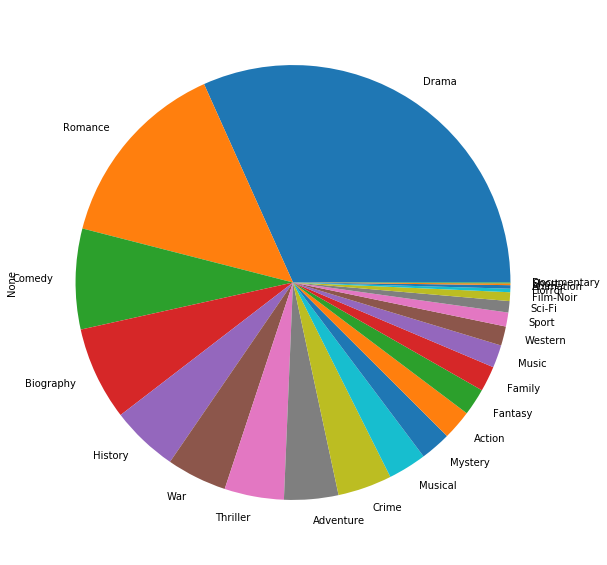

In [4]:
genres.sum().sort_values(ascending=False).plot.pie(figsize=(10,10))

In [5]:
oscar_movies_winner = oscar_movies[oscar_movies["winner"] == True]
oscar_movies_winner.Genre = oscar_movies_winner.Genre.astype(str)
binarizer = MultiLabelBinarizer()
genres_winner = pd.DataFrame(
    binarizer.fit_transform(oscar_movies_winner["Genre"].str.split(", ")),
    columns=binarizer.classes_
)
genres_winner.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Music,Musical,Mystery,Romance,Sport,Thriller,War,Western
0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


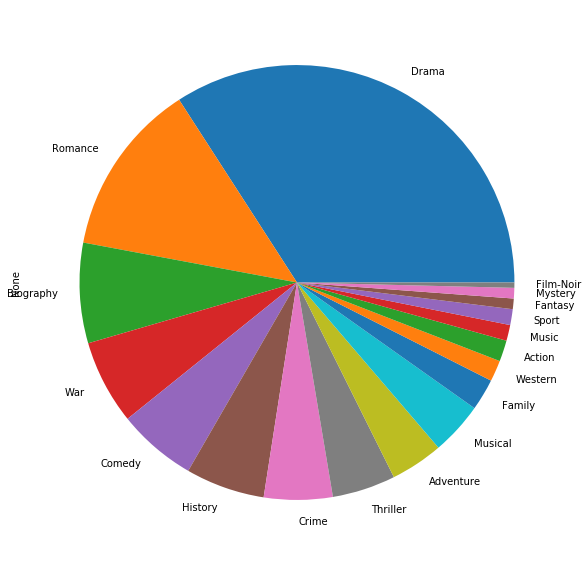

In [6]:
oscar_movies_loser = oscar_movies[oscar_movies["winner"] == False]
oscar_movies_loser.Genre = oscar_movies_winner.Genre.astype(str)
binarizer = MultiLabelBinarizer()
genres_loser = pd.DataFrame(
    binarizer.fit_transform(oscar_movies_winner["Genre"].str.split(", ")),
    columns=binarizer.classes_
)
genres_loser.sum().sort_values(ascending=False).plot.pie(figsize=(10,10))

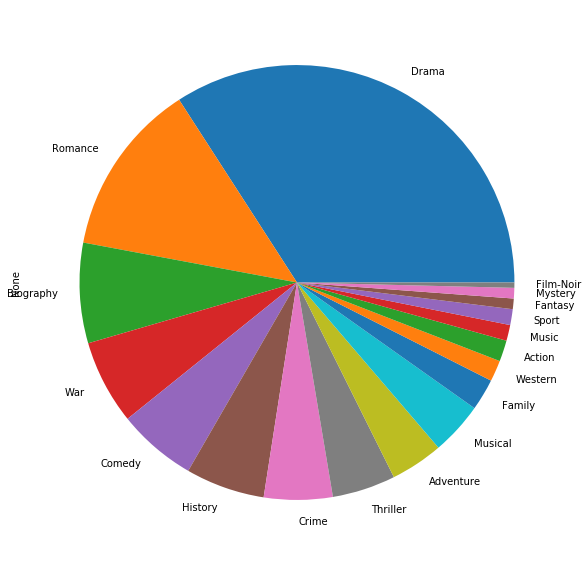

In [7]:
genres_winner.sum().sort_values(ascending=False).plot.pie(figsize=(10,10))

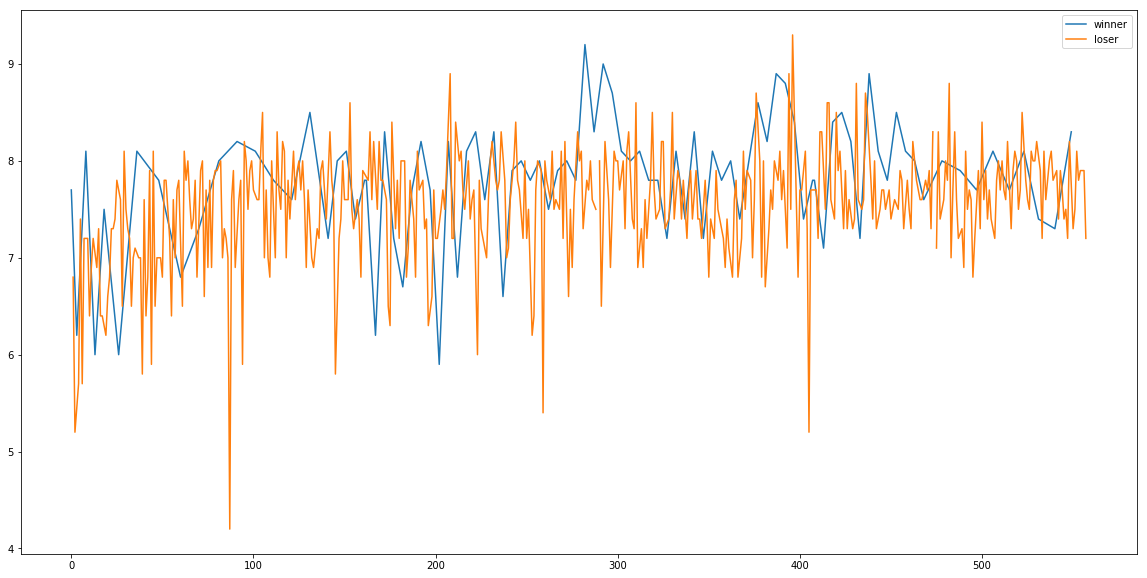

In [8]:
winner_movies = oscar_movies[oscar_movies["winner"]]
loser_movies = oscar_movies[~oscar_movies["winner"]]
winner_movies.imdbRating.plot(figsize=(20,10), legend=True, label="winner")
loser_movies.imdbRating.plot(figsize=(20,10), legend=True, label="loser")

In [9]:
bins = [4, 4.6, 5.1, 5.6, 6.1, 6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6]
names = ["4 to 4.5", "4.6 to 5", "5.1 to 5.5", "5.6 to 6.0", "6.1 to 6.5", 
             "6.6 to 7.0", "7.1 to 7.5", "7.6 to 8.0", "8.1 to 8.5", "8.6 to 9.0", "9.1 to 9.5"]
oscar_movies['Rating_Cohort'] = pd.cut(oscar_movies['imdbRating'], bins, labels=names)

#(dds[dds.Ethnicity == "Hispanic"]["Age Cohort"].
#    value_counts().reindex(new_index).plot.bar())

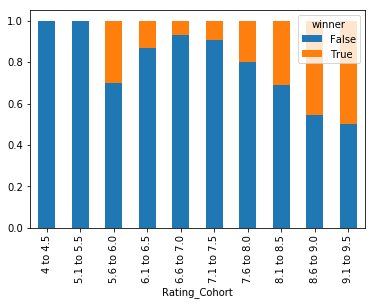

In [10]:
counts = pd.crosstab(oscar_movies.Rating_Cohort, oscar_movies.winner)
winner_given_rating = counts.divide(counts.sum(axis=1), axis=0)
winner_given_rating.plot.bar(stacked=True)

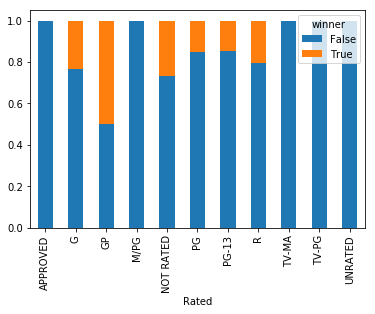

In [11]:
oscar_movies.Rated = oscar_movies[oscar_movies["year"] >= 1960].Rated.str.upper()
counts = pd.crosstab(oscar_movies.Rated, oscar_movies.winner)
winner_given_rating = counts.divide(counts.sum(axis=1), axis=0)
winner_given_rating.plot.bar(stacked=True)

IDEA: split up to see what are the most common ratings for movies in certain years

In [12]:
genre_lists = winner_movies.Genre.str.lower().str.split(", ")

arr = []

for list in genre_lists:
    for genre in list:
        arr.append(genre)
pd.Series(arr).value_counts()

drama        87
romance      33
biography    19
war          16
history      15
             ..
sport         3
music         3
fantasy       2
mystery       2
film-noir     1
Length: 18, dtype: int64

In [13]:
genre_lists = loser_movies.Genre.str.lower().str.split(", ")

arr = []

for list in genre_lists:
    for genre in list:
        arr.append(genre)
pd.Series(arr).value_counts()

drama          401
romance        187
comedy         100
biography       88
history         62
              ... 
horror           4
animation        4
short            2
nan              2
documentary      1
Length: 24, dtype: int64

In [14]:
oscar_movies.Runtime = oscar_movies.Runtime.str.split(" ").str[0].fillna(0).astype(int)

In [15]:
bins = [80, 110, 130, 140 ]
names = ["80", "110", 
             "130"]
oscar_movies['Runtime_Cohort'] = pd.cut(oscar_movies['Runtime'], bins, labels=names)

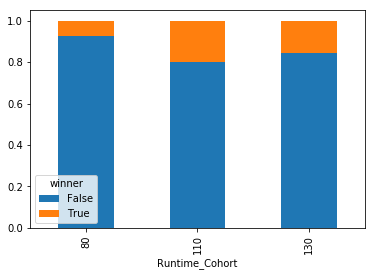

In [16]:
counts = pd.crosstab(oscar_movies.Runtime_Cohort, oscar_movies.winner)
winner_given_rating = counts.divide(counts.sum(axis=1), axis=0)
winner_given_rating.plot.bar(stacked=True)

In [20]:
oscar_movies["Rated"].unique()


array([nan, 'NOT RATED', 'PG-13', 'APPROVED', 'UNRATED', 'TV-PG', 'PG',
       'G', 'TV-MA', 'R', 'M/PG', 'GP'], dtype=object)

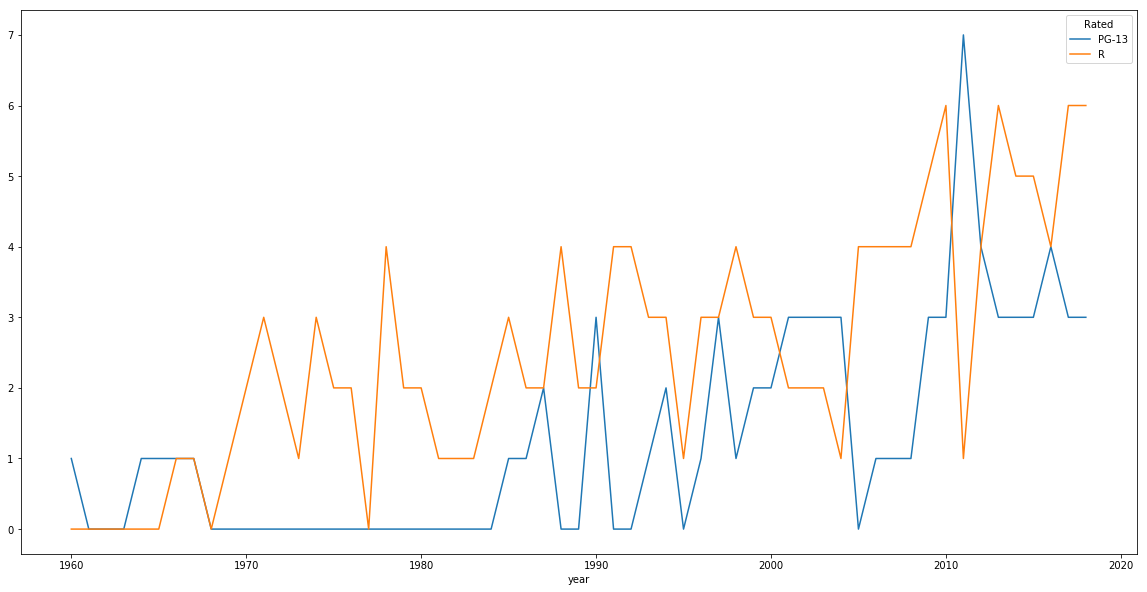

In [61]:
rated_year_movies = oscar_movies.groupby(["year"]).Rated.value_counts()
rated_year_movies_df = rated_year_movies.unstack().fillna(0)
rated_year_movies_df[['PG-13','R']].plot.line(figsize=(20,10))

#rated_year_movies.unstack().loc[['NOT RATED', 'PG-13', 'APPROVED', 'UNRATED', 'TV-PG', 'PG',
#       'G', 'TV-MA', 'R', 'M/PG', 'GP']].plot.line(figsize=(20,10))

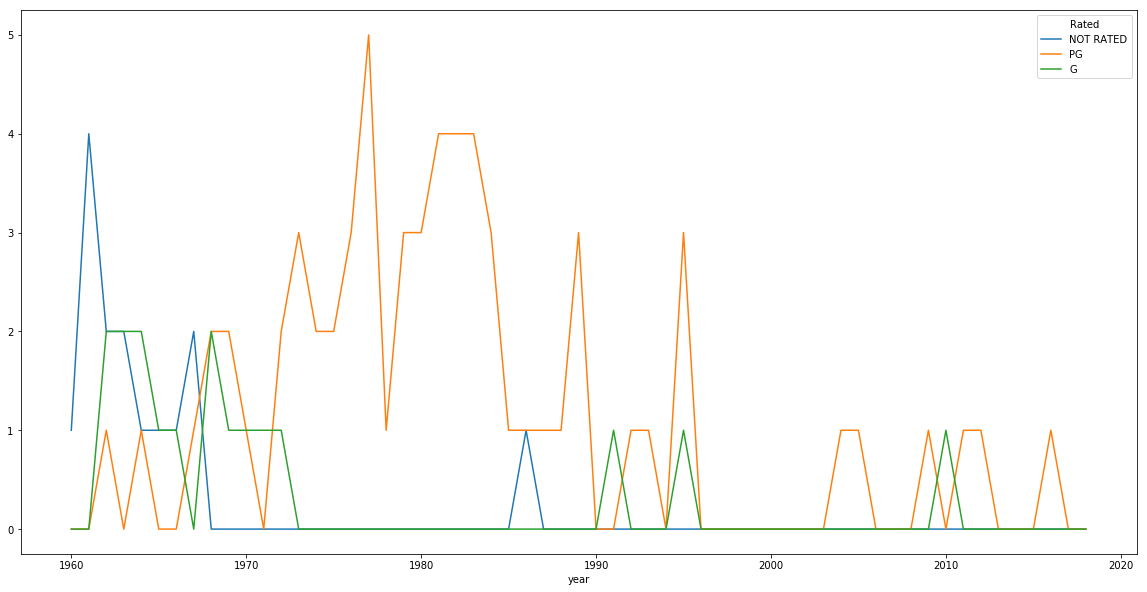

In [73]:
rated_year_movies_df[['NOT RATED','PG','G']].plot.line(figsize=(20,10))

In [79]:
oscar_movies_winner.imdbRating

0      7.7
3      6.2
8      8.1
13     6.0
18     7.5
      ... 
515    7.7
523    8.1
531    7.4
540    7.3
549    8.3
Name: imdbRating, Length: 93, dtype: float64

In [78]:
genre_year_movies = oscar_movies.groupby(["year"]).Rated.value_counts()
genre_year_movies_df = rated_year_movies.unstack().fillna(0)
genre_year_movies_df[['PG-13','R']].plot.line(figsize=(20,10))

0       NaN
3       NaN
8       NaN
13      NaN
18      NaN
       ... 
515    88.0
523    93.0
531    99.0
540    87.0
549    69.0
Name: Metascore, Length: 93, dtype: float64

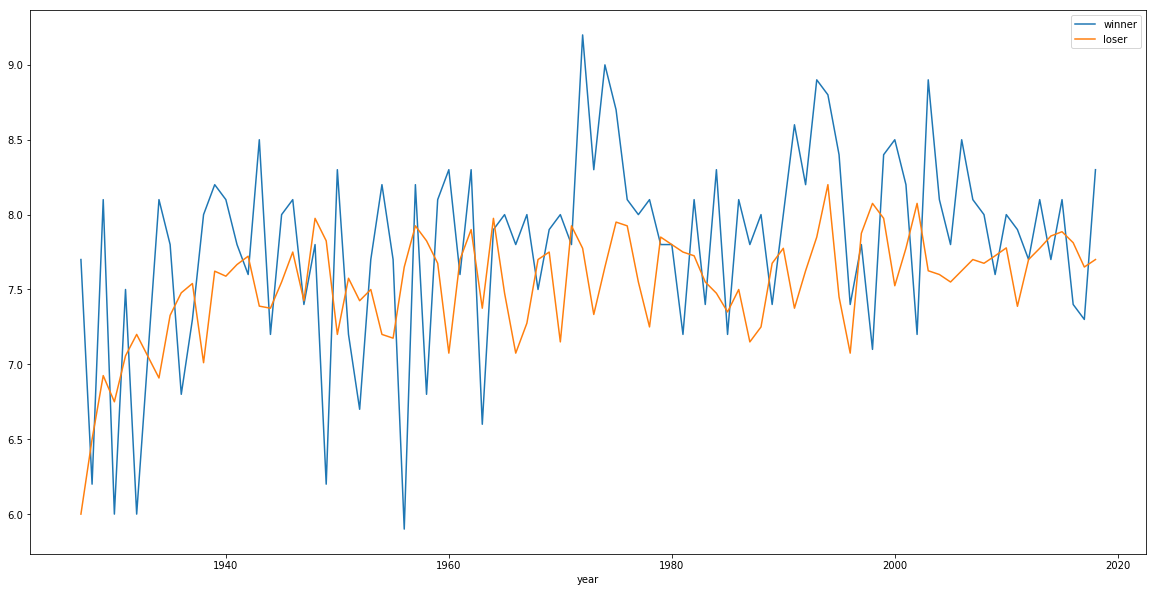

In [82]:
winner_movies = oscar_movies[oscar_movies["winner"]]
loser_movies = oscar_movies[~oscar_movies["winner"]]
winner_movies.groupby(["year"]).imdbRating.mean().plot(figsize=(20,10), legend=True, label="winner")
loser_movies.groupby(["year"]).imdbRating.mean().plot(figsize=(20,10), legend=True, label="loser")

In [84]:
series = (winner_movies.groupby(["year"]).imdbRating.mean() 
          - loser_movies.groupby(["year"]).imdbRating.mean())
series

year
1927    1.700000
1928   -0.300000
1929    1.175000
1930   -0.750000
1931    0.442857
          ...   
2014   -0.157143
2015    0.214286
2016   -0.412500
2017   -0.350000
2018    0.600000
Name: imdbRating, Length: 91, dtype: float64

In [88]:
(series > 0).value_counts()

True     58
False    33
Name: imdbRating, dtype: int64

In [90]:
oscar_movies.columns

Index(['Title', 'producers', 'winner', 'year', 'Actors', 'Awards', 'Country',
       'Director', 'Genre', 'Language', 'Metascore', 'Plot', 'Production',
       'Rated', 'Ratings', 'Released', 'Response', 'Runtime', 'Writer', 'Year',
       'imdbID', 'imdbRating', 'imdbVotes', 'BAFTA', 'NBRA', 'GOLDENGLOBE',
       'SATELLITE', 'DGA', 'tag', 'Rating_Cohort', 'Runtime_Cohort'],
      dtype='object')

In [97]:
len(oscar_movies.Production.str.upper().unique())

121